## Notebook based on [this notebook](https://github.com/cloneofsimo/lora/blob/master/scripts/run_inference.ipynb)

# Imports

In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")

GPU 0: NVIDIA RTX A6000
GPU 1: NVIDIA RTX A6000


## Constants

In [2]:
device     = torch.device('cuda:1') # Mas libre pq la gpu 0 esta el escritorio (xorg y gnome)
model_name = "runwayml/stable-diffusion-v1-5"

## Model

In [3]:
pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 29 files:   0%|          | 0/29 [00:00<?, ?it/s]

## Test model

In [4]:
from lora_diffusion import tune_lora_scale, patch_pipe

patch_pipe(
    pipe,
    "../3_generated_models/taza1/final_lora.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.00)
tune_lora_scale(pipe.text_encoder, 1.00)

<taza1>


In [5]:
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

  0%|          | 0/50 [00:00<?, ?it/s]

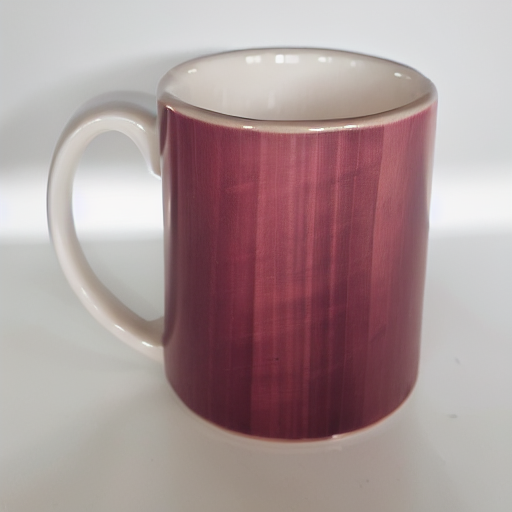

In [10]:
prompt = "photo of mug <taza1> from the front"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

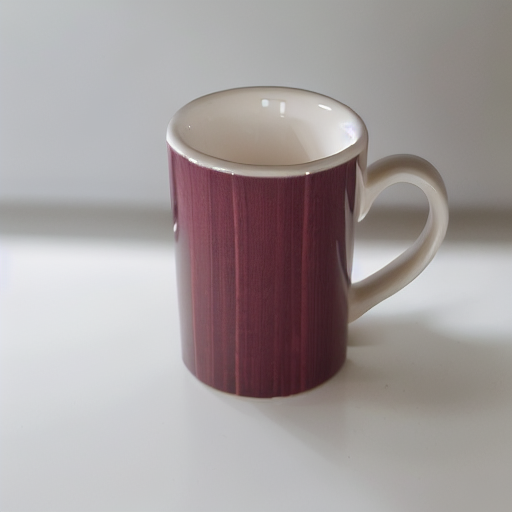

In [94]:
prompt = "photo of mug <taza1> from the front in a table"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

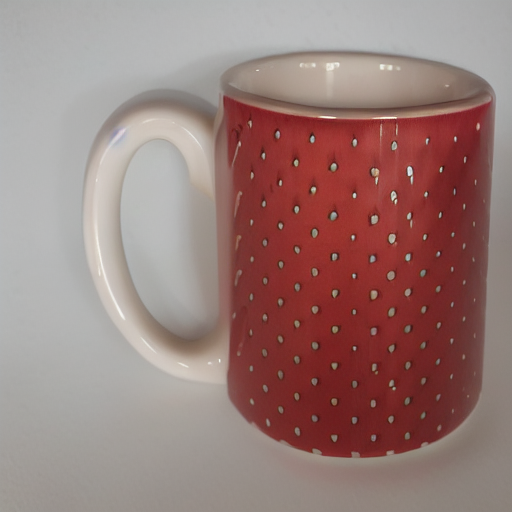

In [30]:
prompt = "photo of mug <taza1> from the front in red with withe dots"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

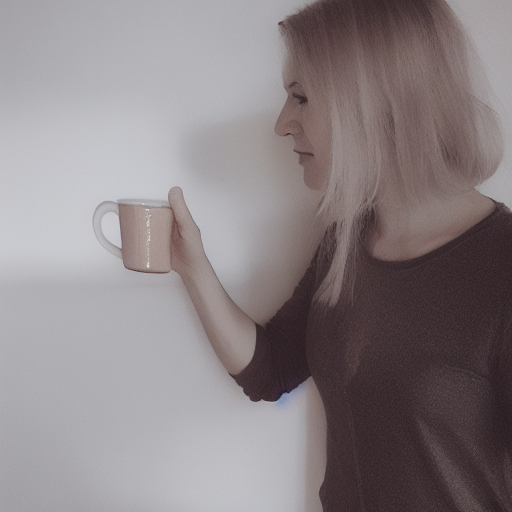

In [41]:
prompt = "photo of a woman drinking tee from mug <taza1>"
image = pipe(prompt, num_inference_steps=50, guidance_scale=3).images[0]
image

# SD 2.1

## Constants

In [19]:
device     = torch.device('cuda:1') # Mas libre pq la gpu 0 esta el escritorio (xorg y gnome)
model_name = "stabilityai/stable-diffusion-2-1-base"

## Model

In [20]:
pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

text_encoder/pytorch_model.fp16.safetensors not found


Fetching 22 files:   0%|          | 0/22 [00:00<?, ?it/s]

## Test model

In [21]:
from lora_diffusion import tune_lora_scale, patch_pipe

patch_pipe(
    pipe,
    "../3_generated_models/taza1-SD21/final_lora.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.00)
tune_lora_scale(pipe.text_encoder, 1.00)

<taza1>


In [22]:
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

  0%|          | 0/50 [00:00<?, ?it/s]

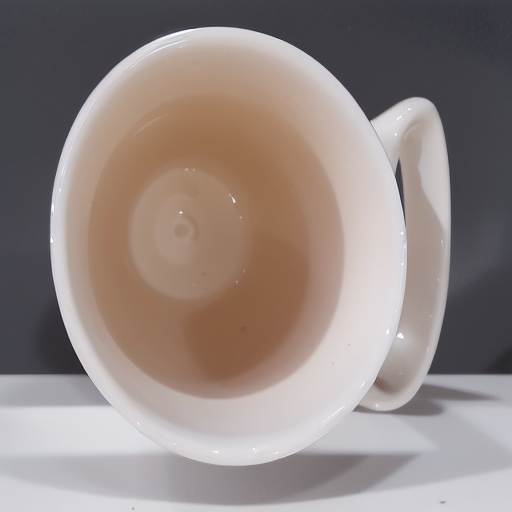

In [45]:
prompt = "photo of mug <taza1> from the front"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

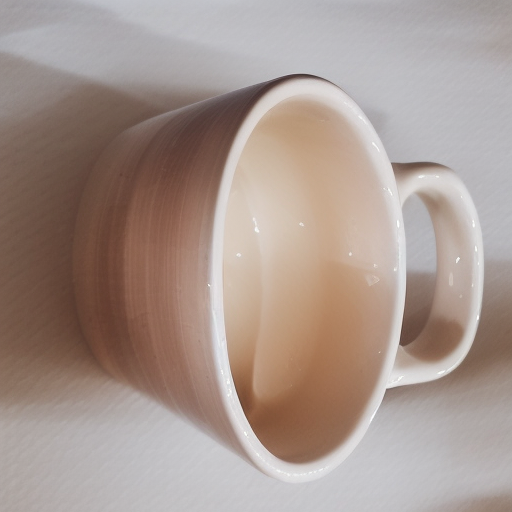

In [59]:
prompt = "photo of mug <taza1> from the front in a table"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

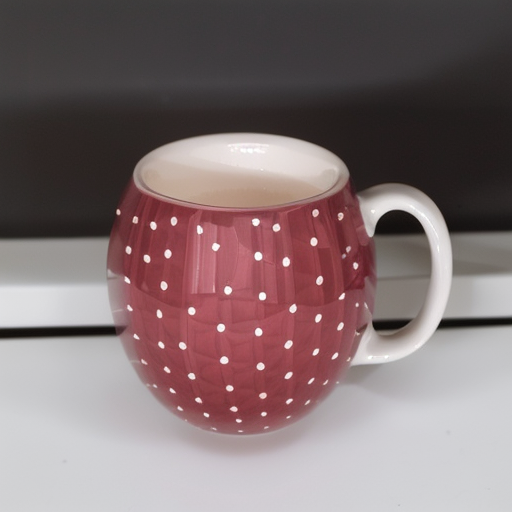

In [63]:
prompt = "photo of mug <taza1> from the front in red with withe dots"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

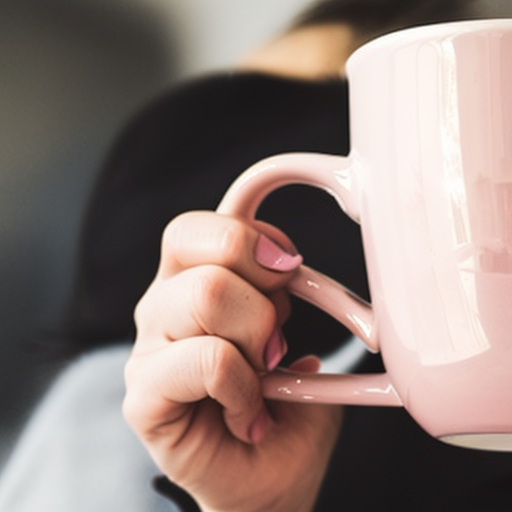

In [56]:
prompt = "photo of a woman drinking tee from mug <taza1>"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image

# SD 1

## Constants

In [64]:
device     = torch.device('cuda:1') # Mas libre pq la gpu 0 esta el escritorio (xorg y gnome)
model_name = "CompVis/stable-diffusion-v1-1"

## Model

In [65]:
pipe = StableDiffusionPipeline.from_pretrained(model_name, torch_dtype=torch.float16).to(device)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

vae/diffusion_pytorch_model.safetensors not found


Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

## Test model

In [66]:
from lora_diffusion import tune_lora_scale, patch_pipe

patch_pipe(
    pipe,
    "../3_generated_models/taza1-SD1/final_lora.safetensors",
    patch_text=True,
    patch_ti=True,
    patch_unet=True,
)

tune_lora_scale(pipe.unet, 1.00)
tune_lora_scale(pipe.text_encoder, 1.00)

<taza1>


In [67]:
def dummy(images, **kwargs):
    return images, False
pipe.safety_checker = dummy

  0%|          | 0/50 [00:00<?, ?it/s]

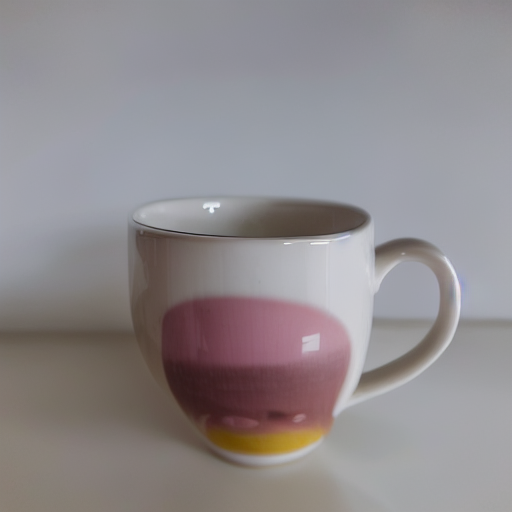

In [73]:
prompt = "photo of mug <taza1> from the front"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

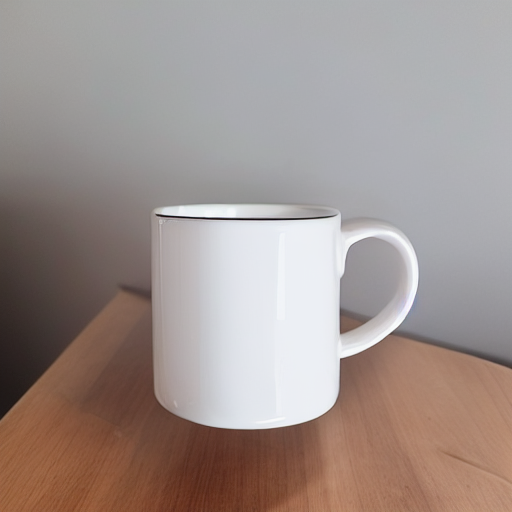

In [72]:
prompt = "photo of mug <taza1> from the front in a table"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

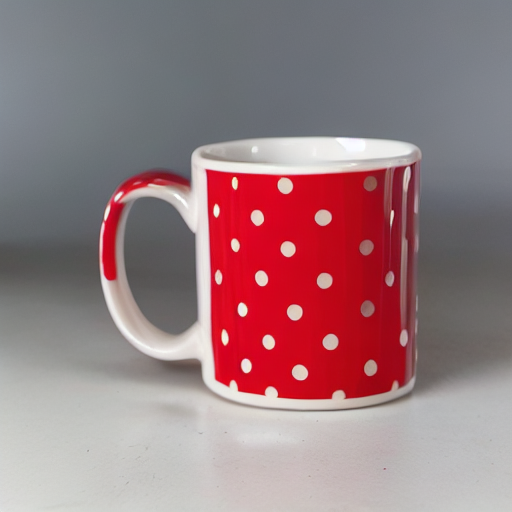

In [70]:
prompt = "photo of mug <taza1> from the front in red with withe dots"
image = pipe(prompt, num_inference_steps=50, guidance_scale=6.5).images[0]
image

  0%|          | 0/50 [00:00<?, ?it/s]

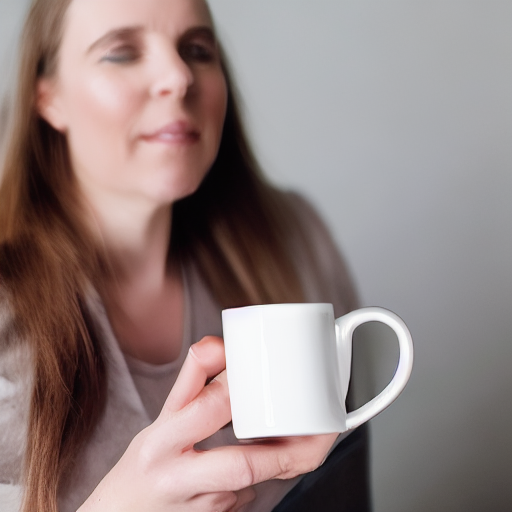

In [71]:
prompt = "photo of a woman drinking tee from mug <taza1>"
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]
image